# 3.1 - STFT

<img style="float: right; margin:5px 0px 0px 10px" src="img/3.1-Titel.png" width="400">
Die Kurzzeit-Fourier-Transformation (STFT) ist eine Fourier-bezogene Transformation, mit der die Sinusfrequenz und der Phasengehalt lokaler Abschnitte eines Signals bestimmt werden, wenn sie sich im Laufe der Zeit ändern. In der Praxis besteht das Verfahren zum Berechnen von STFTs darin, ein längeres Zeitsignal in kürzere Segmente gleicher Länge zu unterteilen und dann die Fourier-Transformation für jedes kürzere Segment separat zu berechnen. Dies zeigt das Fourier-Spektrum für jedes kürzere Segment. Man zeichnet dann normalerweise die sich ändernden Spektren als Funktion der Zeit auf, die als Spektrogramm oder Wasserfalldiagramm bekannt sind.

## Inhalt  
<table style="width:256px; border: 1px solid black; display: inline-block">
    <tr>
        <td  style="text-align:right" width=64px><img src="img/1-1.png" style="float:left"></td>
        <td style="text-align:left" width=256px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#1'>
                1. Nichtstationäre Signale
            </a>
        </td>
    </tr>  
    <tr>
        <td style="text-align:right"><img src="img/1-2.jpg" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#2'>
                2. Fensterung
            </a>
        </td>
    </tr>
    <tr>
        <td style="text-align:right"><img src="img/1-3.jpg" style="float:left"></td>
        <td style="text-align:left" width=128px>
            <a style="color:black; font-size:12px; font-weight:bold; text-decoration:none" href='#3'>
                3. Kurzzeitspektrum
            </a>
        </td>
    </tr>
</table>

----

<a id='1'></a>
<div>
    <img src="img/1-1.png" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        1. Nichtstationäre Signale 
    </h2>
</div>

Signale, die Realisierungen nichtstationärer Prozesse sind, werden kurz als nichtstationäre Signale bezeichnet.  
Da die Fourier-Transformation nur für stationäre Signale geeignet ist, deren Statistik sich nicht mit der Zeit ändert. Es wird angenommen, dass das Signal zeitunabhängig ist, so dass alle Frequenzbereichsinformationen des Signals erhalten werden können. In der Praxis sind die Signale jedoch häufig nicht stationäre Signale, d.h., sie ändern sich mit der Zeit. Wenn das Spektrum durch Fourier-Transformation analysiert wird, gehen unweigerlich wichtige Zeitinformationen verloren. Daher müssen bei nicht stationären Signalen die lokalen Eigenschaften berücksichtigt werden. Wo es möglich ist, verarbeitet man sie in zeitbegrenzten Segmenten, die als Zeitfenster bezeichnet werden und in denen das Signal als quasistationär betrachtet wird.   

Als Beispiel erzeugen wir einige Signale und analysen die Frequenzgänge:

In [30]:
# Packages importieren
import numpy as np
import simpleaudio as sa
import matplotlib.pyplot as plt
from scipy import fftpack, signal
from scipy.signal import stft, spectrogram

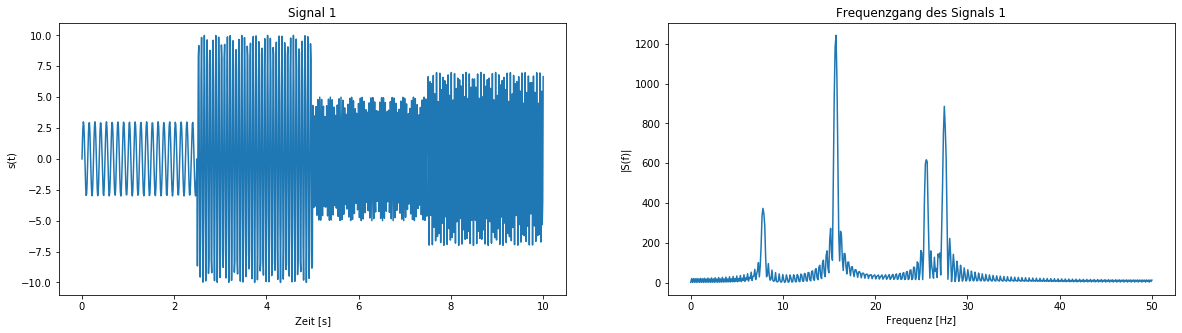

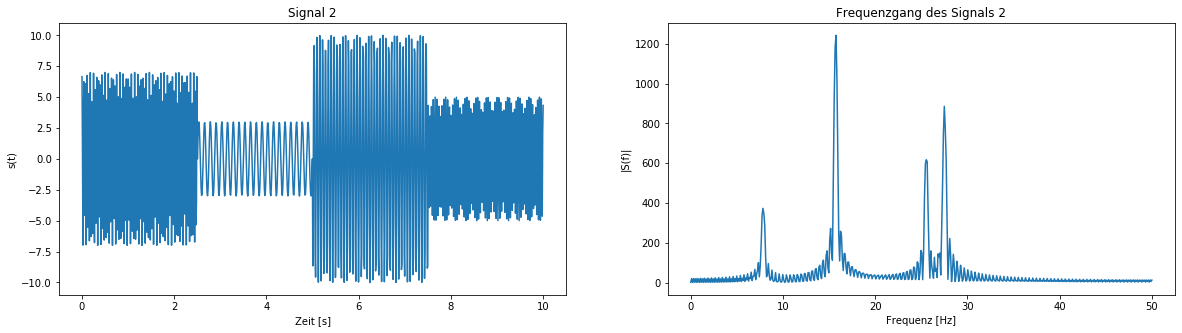

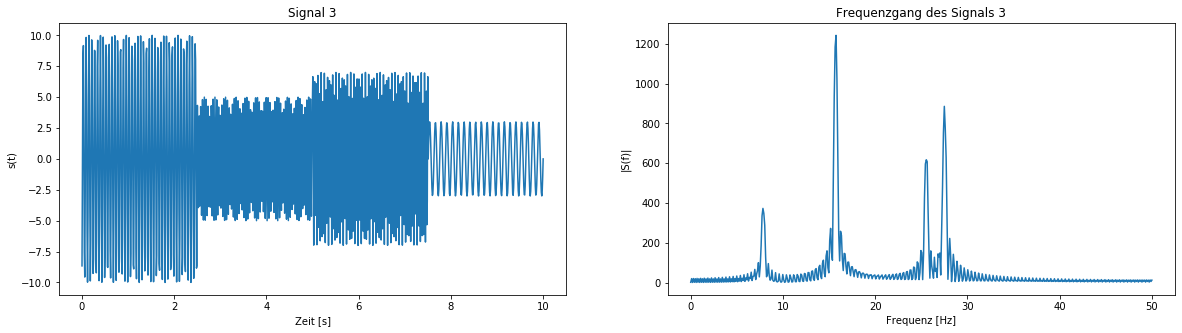

In [145]:
# Initialisierung der Variablen
fs_Hz = 100                                     # Abtrastfrequenz
N = int(2**(np.floor(np.log2(10*fs_Hz))+1))     # Länge von FFT
amplitude = 1
T_s = 10                                        # Zeitdauer
t_s = np.linspace(0, T_s, T_s*fs_Hz)            # Zeitbereich
t2_s = np.linspace(0, T_s//4, T_s*fs_Hz//4)     # Halbzeitbereich
f_Hz = np.linspace(0, fs_Hz//2, N//2)           # Frequenzbereich

# 3 Signale mit verschiedenen Zeitreigenb
seg1 = 3*np.sin(20*np.pi*t2_s)
seg2 = 10*np.sin(40*np.pi*t2_s + 5/3*np.pi)
seg3 = 5*np.sin(65*np.pi*t2_s + 2/3*np.pi)
seg4 = 7*np.sin(70*np.pi*t2_s + 2/5*np.pi)
s1 = np.append(np.append(seg1, seg2), np.append(seg3, seg4))
s2 = np.append(np.append(seg4, seg1), np.append(seg2, seg3))
s3 = np.append(np.append(seg2, seg3), np.append(seg4, seg1))

# Graphische Darstellung
i = 0
for s in (s1, s2, s3):
    i += 1
    S = np.abs(fftpack.fft(s))  # Frequenzgänge
    plt.subplot(121)
    plt.title('Signal %d' %i)
    plt.xlabel('Zeit [s]') 
    plt.ylabel('s(t)') 
    plt.plot(t_s, s)
    plt.subplot(122)
    plt.title('Frequenzgang des Signals %d' %i)
    plt.xlabel('Frequenz [Hz]') 
    plt.ylabel('|S(f)|') 
    plt.plot(f_Hz, S[:len(f_Hz)])
    plt.gcf().set_size_inches(20, 5)
    plt.show()

Daraus könne wir finden, während das Fourier-Spektrum die Frequenzkomponenten richtig identifiziert, gibt es keine Information darüber, wo diese Harmonischen im Zeitbereich beginnen oder enden. Alle Informationen über den Zeitbereich sind verloren gegangen, da jede Frequenzkomponente eine unendliche Zeitdauer annimmt.

----

<a id='2'></a>
<div>
    <img src="img/1-2.jpg" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        2. Fensterung  
    </h2>
</div>

Soweit wir die tatsächlichen Ergebnisse beobachtet haben, können wir die Methode zur Aufteilung des instationären Signals in kurze Segmente, die mehr oder weniger als quasistationär angesehen werden, in Betracht ziehen und das Frequenzspektrum dieser Segmente separat berechnen. Man erhält eine Reihe einzelner Frequenzspektren, die die Dynamik des Signals berücksichtigen. Wenn Sie mit einem zeitkontinuierlichen Signal beginnen, ist die Fourier-Integration natürlich für die Transformation des Signalteils verantwortlich. Dieser Vorgang wird als Kurzzeit-Fourier-Transformation oder STFT (Short-Time Fourier Transform) bezeichnet.

Wir haben bereits in vorherigen Themen gesehen, dass das bloße Ausschneiden eines Signalabschnittes, das einer Multiplikation des Signals mit einem Rechteckfenster entspricht, zu einer Verwischung des Spektrums führt, die durch die Wahl anderer Fensterfunktionen abgemildert werden kann. Aus diesem Grund stellt man auch bei der Kurzzeit-Spektralanalyse die zu analysierenden Signalabschnitte durch Multiplikation des Signals $s(t)$ mit einer geeigneten Fensterfunktion $h(t)$ her. Man spricht dabei vereinfacht von Fensterung oder Zeitfensterung. Die Zeitfensterlänge (der Zeitabschnitt, in dem $h(t)$ von Null verschieden ist), die wir mit $T$ bezeichnet werden, muss mit der gewünschten Dauer des Signalsegments übereinstimmen. Die Wahl der Fensterfunktion $h(t)$ und der Zeitfensterlänge $T$ muss problemspezifisch erfolgen und kann nur im Zusammenhang mit der Optimierung des konkret vorliegenden Signalmodells gesehen werden.

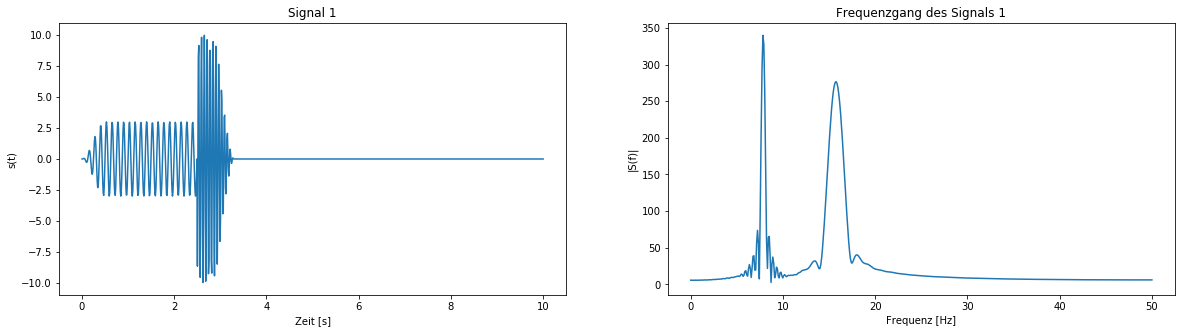

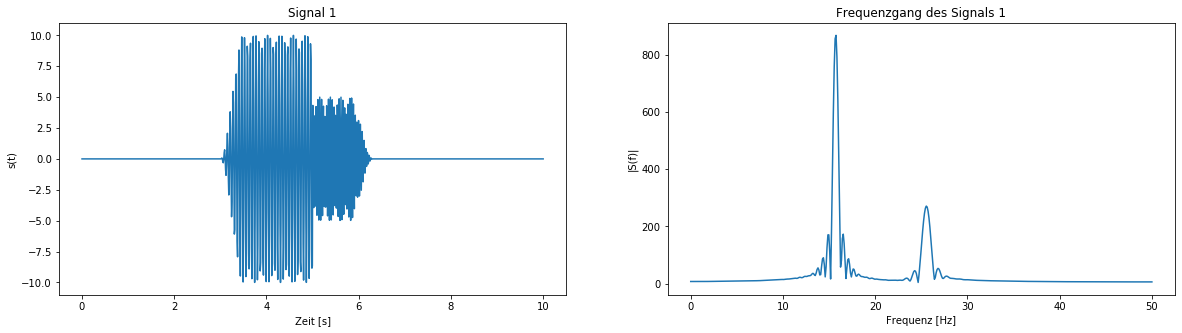

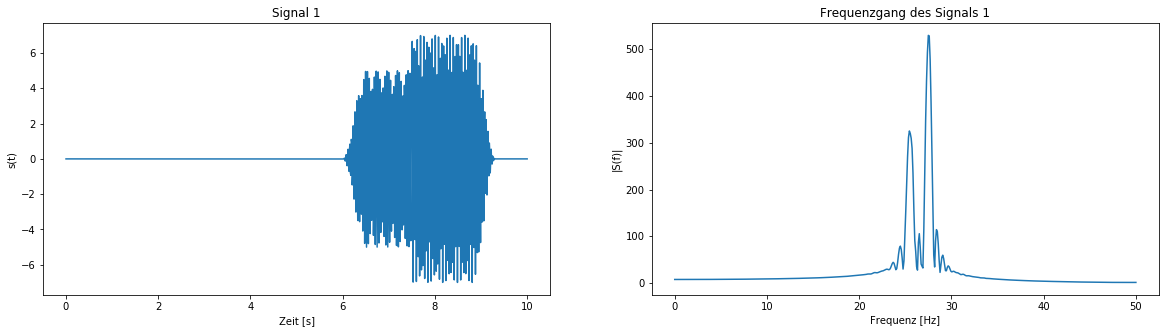

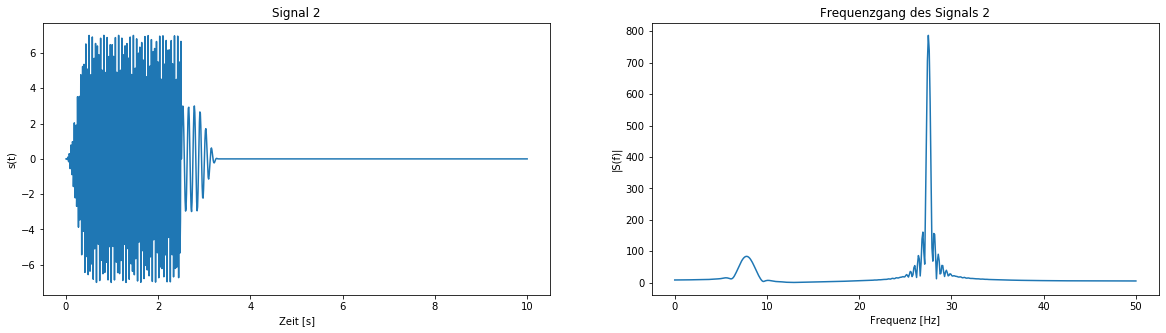

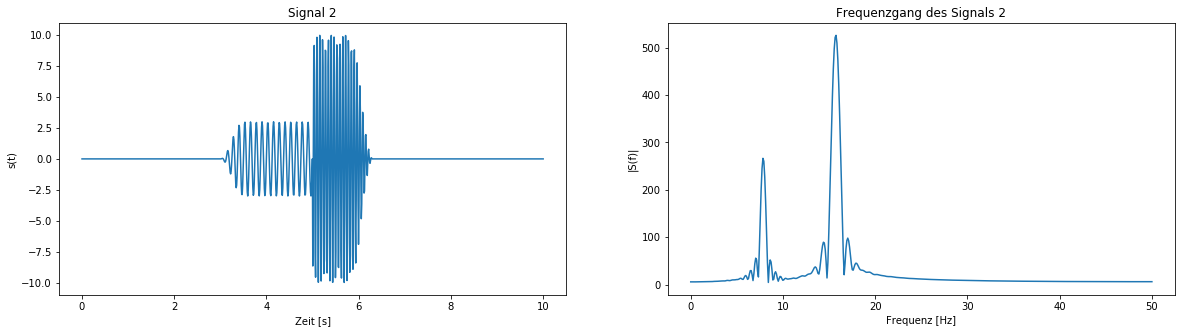

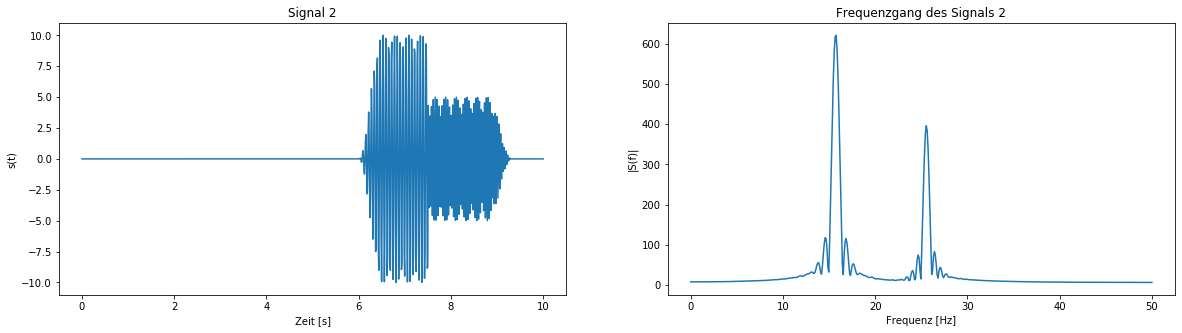

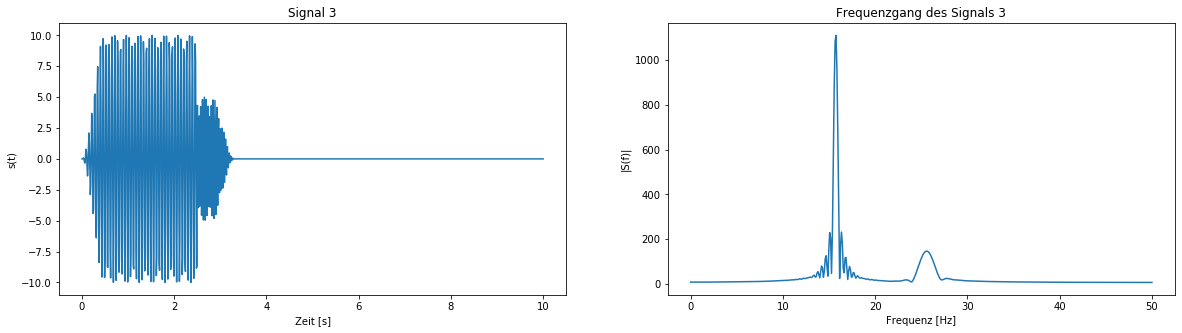

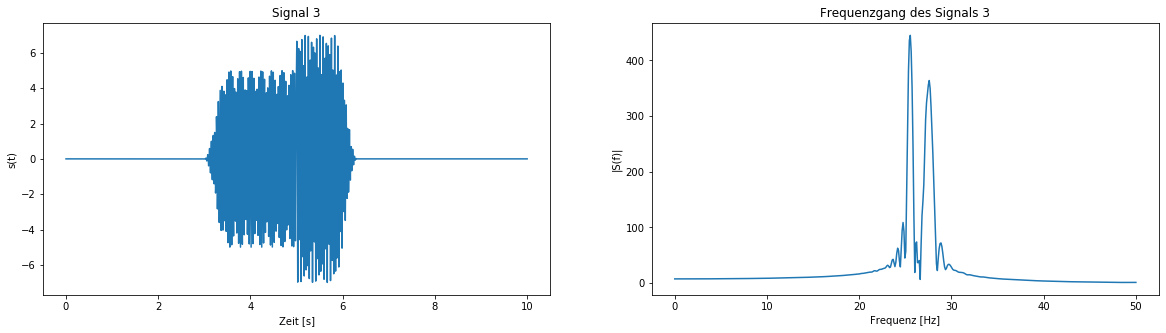

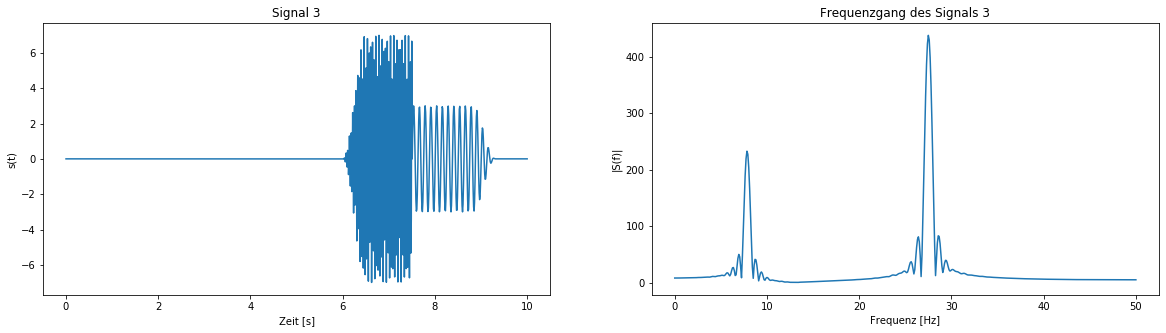

In [155]:
# Dynamische Fensterung der Signale
T = 330  # Fensterlänge
it_s = 300  # Interval
window = signal.get_window(('tukey', 0.3), T)

i = 0
for s in (s1, s2, s3):
    i += 1
   
    for t in range(len(t_s)//it_s):
        slide = np.zeros(len(t_s))
        slide[t*it_s: t*it_s + T] = window
        s_win = s * slide
        S_win = np.abs(fftpack.fft(s_win))  
        
        # Darstellung
        plt.subplot(121)
        plt.title('Signal %d' %i)
        plt.xlabel('Zeit [s]') 
        plt.ylabel('s(t)') 
        plt.plot(t_s, s_win)
        plt.subplot(122)
        plt.title('Frequenzgang des Signals %d' %i)
        plt.xlabel('Frequenz [Hz]') 
        plt.ylabel('|S(f)|') 
        plt.plot(f_Hz, S_win[:len(f_Hz)])
        plt.gcf().set_size_inches(20, 5)
        plt.pause(0.1)
        

----

<a id='3'></a>
<div>
    <img src="img/1-3.jpg" style="float:left">
    <h2 style="position: relative; top: 6px; left: 6px">
        3. Kurzzeitspektrum  
    </h2>
</div>

Setzt man den Signalabschnitt als zu transformierende Funktion in das Fourier-Integral ein, erhält man die Hintransformationsgleichung der STFT wie folgt:
\begin{equation}
X(\omega, t)=\int_{-\infty}^{\infty}x(\tau)h(t-\tau)e^{-j\omega \tau}d\tau 
\end{equation} 
Das dabei entstehende Spektrum hat außer der Kreisfrequenz $\omega$ nun auch noch den Analysezeitpunkt $t$ als Variable. Da wir gewöhnlich voraussetzen, dass die Zeitfensterlänge $T$ endlich ist, können die Integrationsgrenzen entsprechend eingeengt werden.  
Mittels [signal.stft()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.stft.html) und [signal.spectrogram()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html#scipy.signal.spectrogram) können wir das Spektrum sowie deren Spetrogram darstellen:

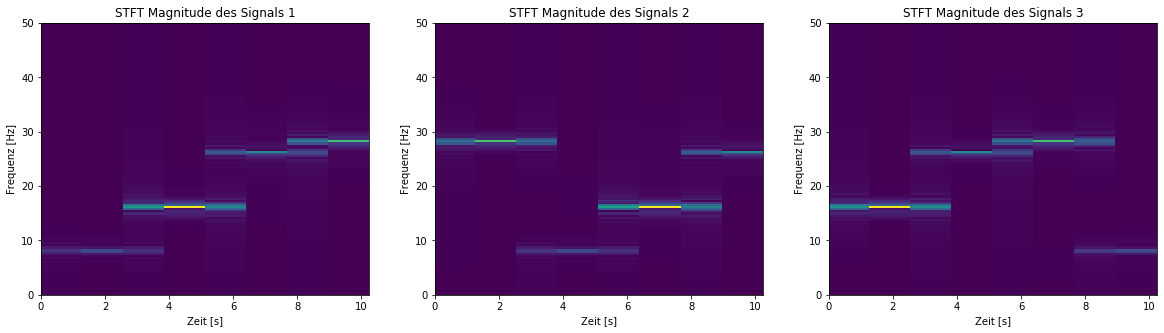

In [148]:
# STFT
i = 0
for s in (s1, s2, s3):
    i += 1
    f, t, Zxx = signal.stft(s, fs_Hz, ('tukey', 0.3))  # Frequenzgänge
    plt.subplot(1,3,i)
    plt.pcolormesh(t, f, np.abs(Zxx))
    plt.title('STFT Magnitude des Signals %d' %i)
    plt.xlabel('Zeit [s]') 
    plt.ylabel('Frequenz [Hz]')   
    
plt.gcf().set_size_inches(20, 5)
plt.show()

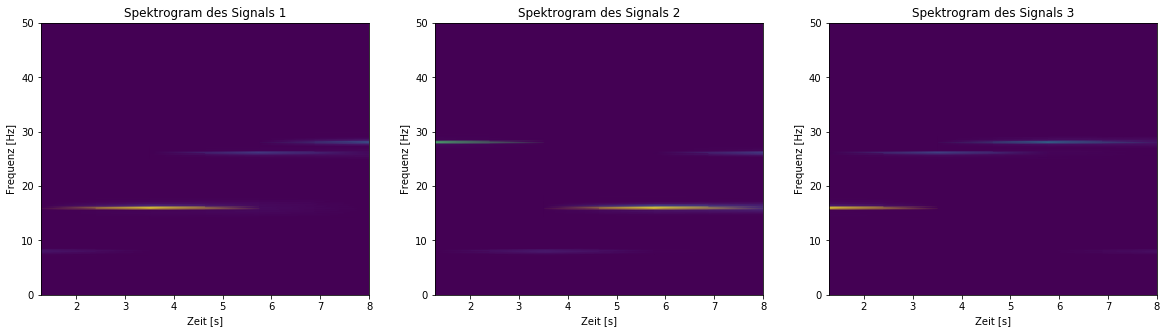

In [151]:
# Spektrogram
i = 0
for s in (s1, s2, s3):
    i += 1
    f, t, Sxx = spectrogram(s, fs_Hz)
    plt.subplot(1,3,i)
    
    plt.pcolormesh(t, f, Sxx, shading='gouraud')
    plt.title('Spektrogram des Signals %d' %i)
    plt.xlabel('Zeit [s]') 
    plt.ylabel('Frequenz [Hz]')   
    
plt.gcf().set_size_inches(20, 5)
plt.show()

----

### References

1. Titelbild von [Ethan Weil](https://de.wikipedia.org/wiki/Kurzzeit-Fourier-Transformation#/media/Datei:Short_time_fourier_transform.PNG)  
2. [Short-time Fourier transform](https://en.wikipedia.org/wiki/Short-time_Fourier_transform)
3. Lehrbuch: [Intelligente Signalverarbeitung 1 - Signalanalyse](https://katalog.slub-dresden.de/id/0-1654371521/#detail)